# Calibrating pulsed laser

We want to understand how much energy is being delivered on each pulse of our laser. 

We're going to start by measuring the average power over time and the frequency of the laser pulses. First, let's import our data:

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import sem

data_freq = "data/20230519/05-19-FreqMax.csv"
df = pd.read_csv(data_freq, sep = ",", header = None)
freq = [float(i) for i in df[2][1:].values] # in Hertz
power = [float(i) for i in df[4][1:].values] # in micro-Watts

We know that in order to find the energy in our system, we must divide the power by the frequency. Let's now graph the energy vs the frequency.

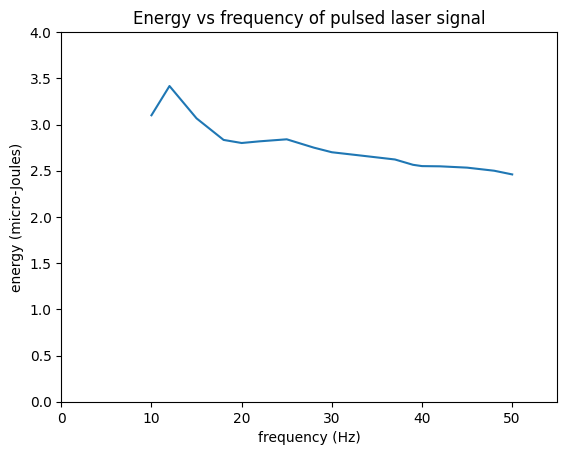

In [4]:
energy = np.array(power) / np.array(freq)
plt.plot(freq, energy)
plt.title("Energy vs frequency of pulsed laser signal")
plt.xlabel("frequency (Hz)")
plt.ylabel("energy (micro-Joules)")
plt.xlim([0, 55])
plt.ylim([0, 4])
plt.show()

Next, we looked to characterize the energy given by the pulse in relation to the angle on the polarizer that we're using in our system.

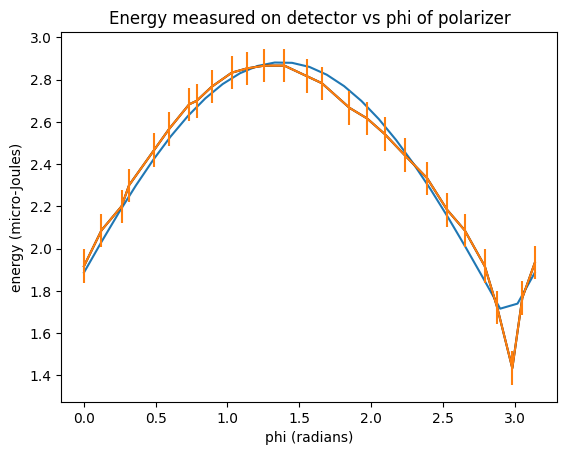

In [25]:
df = pd.read_csv("data/20230519/05-19-Phi.csv", sep = ",", header = None)
freq = [float(i) for i in df[1][1:].values]
power = [float(i) for i in df[4][1:].values]
phi = [(float(i) * np.pi) / 180 for i in df[2][1:].values]
energy = np.array(power) / np.array(freq)

def fit_func(phi, amplitude, phi0, c):
    return amplitude * np.abs(np.cos(phi + phi0)) + c

popt, pcov = curve_fit(fit_func, phi, energy, [1, (np.pi / 2), 1.4])
plt.plot(np.linspace(0, np.pi, num = 27), fit_func(np.linspace(0, np.pi, num = 27), popt[0], popt[1], popt[2]))
err = sem(energy)
plt.plot(phi, energy, c = "k")
plt.errorbar(phi, energy, yerr = err)
plt.title("Energy measured on detector vs phi of polarizer")
plt.xlabel("phi (radians)")
plt.ylabel("energy (micro-Joules)")
plt.show()

We expect this data to fit to a $cos^2(x)$ function, but as can be seen above, the graph fits much better to the absolute value of $cos(x)$